# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Rizky Febrian Dwi Putra
- **Email:** rizkifdp@gmail.com
- **ID Dicoding:** RIZKY FEBRIAN DWI PUTRA

## Menentukan Pertanyaan Bisnis

- Apa saja faktor yang mempengaruhi penyewaan sepeda?
-  Musim apa yang menunjukkan peningkatan penyewaan sepeda, dan apa rekomendasi pendekatan penjualan yang efektif pada musim tersebut?


## Import Semua Packages/Library yang Digunakan

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
!pip freeze > requirements.txt

## Data Wrangling

### Gathering Data

In [54]:
df_day = pd.read_csv('day.csv')
df_hour = pd.read_csv('hour.csv')

In [55]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [56]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## **Informasi Data**

- **dteday**
  - **Tipe Data**: Datetime
  - **Deskripsi**: Tanggal

- **hum**
  - **Tipe Data**: Float
  - **Deskripsi**: Kelembaban yang dinormalisasi. Nilai dibagi menjadi 100 (nilai maksimum).

- **weathersit**
  - **Tipe Data**: Integer
  - **Deskripsi**:
    - 1: Cerah, sedikit awan, sebagian besar cerah
    - 2: Kabut dan awan, kabut dan awan pecah, serta sedikit awan
    - 3: Mendung, hujan ringan dan petir serta awan tersebar, dan hujan ringan
    - 4: Hujan deras dan pelet es, serta hujan dan kabut salju

- **holiday**
  - **Tipe Data**: Integer
  - **Deskripsi**: Menunjukkan apakah hari tersebut adalah hari libur atau tidak (1: hari libur, 0: tidak hari libur).

- **season**
  - **Tipe Data**: Integer
  - **Deskripsi**:
    - 1: Musim dingin
    - 2: Musim semi
    - 3: Musim panas
    - 4: Musim gugur

- **temp**
  - **Tipe Data**: Float
  - **Deskripsi**: Suhu dalam Celsius. Nilai dibagi menjadi 50 (nilai maksimum).

- **atemp**
  - **Tipe Data**: Float
  - **Deskripsi**: Suhu yang dirasakan dalam Celsius. Nilai dibagi menjadi 39 (nilai maksimum).

- **casual**
  - **Tipe Data**: Integer
  - **Deskripsi**: Jumlah pengguna kasual.

- **registered**
  - **Tipe Data**: Integer
  - **Deskripsi**: Jumlah pengguna terdaftar.

- **cnt**
  - **Tipe Data**: Integer
  - **Deskripsi**: Jumlah total sepeda sewa termasuk pengguna kasual dan terdaftar.

**Insight:**
- 2 Dataset terdiri dari total kolom yang dibagi menjadi harian dan per jam. Kolom-kolom tersebut meliputi **instant**, **dteday**, **season**, **yr**, **mnth**, **hr**, **holiday**, **weekday**, **workingday**, **weathersit**, **temp**, **atemp**, **hum**, **windspeed**, **casual**, **registered**, dan **cnt**. Data ini memungkinkan analisis yang mendalam terhadap penyewaan sepeda berdasarkan variabel waktu dan kondisi cuaca.

### Assessing Data

In [57]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [58]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [59]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [60]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [61]:
print("df_day","\n",df_day.isnull().sum())
print("\n")
print("df_hour","\n",df_hour.isnull().sum())

df_day 
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


df_hour 
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [62]:
print("df_day duplicate = ",df_day.duplicated().sum())
print("df_hour duplicate = ",df_hour.duplicated().sum())

df_day duplicate =  0
df_hour duplicate =  0


In [63]:
def count_outliers(df):
  outlier_counts = {}
  for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):  # Check if the column is numeric
      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR
      outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
      outlier_counts[col] = outlier_count
    else:
      outlier_counts[col] = 0  # Non-numeric columns don't have outliers in this context
  return outlier_counts

# Example usage for df_day:
outlier_counts_day = count_outliers(df_day)
print("Outlier counts in df_day:")
for col, count in outlier_counts_day.items():
  print(f"{col}: {count}")

# Example usage for df_hour:
outlier_counts_hour = count_outliers(df_hour)
print("\nOutlier counts in df_hour:")
for col, count in outlier_counts_hour.items():
  print(f"{col}: {count}")

Outlier counts in df_day:
instant: 0
dteday: 0
season: 0
yr: 0
mnth: 0
holiday: 21
weekday: 0
workingday: 0
weathersit: 0
temp: 0
atemp: 0
hum: 2
windspeed: 13
casual: 44
registered: 0
cnt: 0

Outlier counts in df_hour:
instant: 0
dteday: 0
season: 0
yr: 0
mnth: 0
hr: 0
holiday: 500
weekday: 0
workingday: 0
weathersit: 3
temp: 0
atemp: 0
hum: 22
windspeed: 342
casual: 1192
registered: 680
cnt: 505


**Insight:**
- Dari analisis data, dapat disimpulkan bahwa tidak terdapat duplikasi atau data kosong.

- Terdapat beberapa outlier yang signifikan, yaitu pada kolom kelembapan (hum), kecepatan angin (windspeed), serta jumlah penyewa kasual (casual), penyewa terdaftar (registered), dan total penyewaan (cnt). Identifikasi outlier ini penting untuk memastikan keakuratan dan integritas analisis data lebih lanjut.

- kolom date masih bersifat objek

### Cleaning Data

In [64]:
def remove_outliers(df):
    df_cleaned = df.copy()
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    return df_cleaned

# Remove outliers from df_day
df_day_cleaned = remove_outliers(df_day)

# Remove outliers from df_hour
df_hour_cleaned = remove_outliers(df_hour)

# Verify outlier removal
outlier_counts_day_cleaned = count_outliers(df_day_cleaned)
print("\nOutlier counts in df_day after cleaning:")
for col, count in outlier_counts_day_cleaned.items():
    print(f"{col}: {count}")

outlier_counts_hour_cleaned = count_outliers(df_hour_cleaned)
print("\nOutlier counts in df_hour after cleaning:")
for col, count in outlier_counts_hour_cleaned.items():
    print(f"{col}: {count}")

print("\nCleaned df_day:")
print(df_day_cleaned.head())

print("\nCleaned df_hour:")
print(df_hour_cleaned.head())


Outlier counts in df_day after cleaning:
instant: 0
dteday: 0
season: 0
yr: 0
mnth: 0
holiday: 0
weekday: 0
workingday: 0
weathersit: 0
temp: 0
atemp: 0
hum: 0
windspeed: 2
casual: 16
registered: 0
cnt: 0

Outlier counts in df_hour after cleaning:
instant: 0
dteday: 0
season: 0
yr: 0
mnth: 0
hr: 0
holiday: 0
weekday: 0
workingday: 0
weathersit: 0
temp: 0
atemp: 0
hum: 0
windspeed: 0
casual: 505
registered: 385
cnt: 133

Cleaned df_day:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0

In [65]:
def remove_outliers(df):
    df_cleaned = df.copy()
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            # Check if the column contains values between 0 and 1
            if not all(0 <= value <= 1 for value in df[col]):
                Q1 = df[col].quantile(0.25)
                Q3 = df[col].quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    return df_cleaned

# Remove outliers from df_day
df_day_cleaned = remove_outliers(df_day)

# Remove outliers from df_hour
df_hour_cleaned = remove_outliers(df_hour)


print("\nCleaned df_day:")
print(df_day_cleaned.head())

print("\nCleaned df_hour:")
print(df_hour_cleaned.head())


Cleaned df_day:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

Cleaned 

In [66]:
#format data
df_day_cleaned['dteday'] = pd.to_datetime(df_day_cleaned['dteday'])
df_hour_cleaned['dteday'] = pd.to_datetime(df_hour_cleaned['dteday'])

In [67]:
# Define a function to determine the season based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    elif month in [9, 10, 11]:
        return 'autumn'
    else:
        return 'unknown'  # Handle cases where the month is invalid

# Apply the function to create the 'season' column in df_day_cleaned
df_day_cleaned['season'] = df_day_cleaned['dteday'].dt.month.apply(get_season)

# Apply the function to create the 'season' column in df_hour_cleaned
df_hour_cleaned['season'] = df_hour_cleaned['dteday'].dt.month.apply(get_season)

# Display the updated DataFrames (optional)
print(df_day_cleaned.head())
print(df_hour_cleaned.head())

   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01  winter   0     1        0        6           0   
1        2 2011-01-02  winter   0     1        0        0           0   
2        3 2011-01-03  winter   0     1        0        1           1   
3        4 2011-01-04  winter   0     1        0        2           1   
4        5 2011-01-05  winter   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant     dteday  season  y

In [68]:
df_day_cleaned.describe()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,687.000000,687,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000
mean,357.339156,2011-12-23 08:08:23.056768512,0.477438,6.512373,0.026201,2.965066,0.726346,1.403202,0.487475,0.467232,0.628917,0.191123,732.010189,3608.756914,4340.767103
min,1.000000,2011-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,173.500000,2011-06-22 12:00:00,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.327917,0.326064,0.520000,0.134952,295.000000,2452.500000,3002.000000
50%,350.000000,2011-12-16 00:00:00,0.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.475833,0.466525,0.626667,0.180967,674.000000,3603.000000,4381.000000
75%,543.500000,2012-06-26 12:00:00,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.650416,0.604811,0.733334,0.234051,1026.500000,4686.000000,5583.500000
max,731.000000,2012-12-31 00:00:00,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,2258.000000,6946.000000,8173.000000
std,212.261294,NaN,0.499855,3.517065,0.159849,1.932219,0.446158,0.549732,0.184392,0.164292,0.143854,0.078409,521.433756,1580.356697,1866.258997


**Insight:**
- Analisis outlier sebelum dan sesudah pembersihan data menunjukkan penurunan signifikan yang diperoleh melalui tahap data cleaning. Di df_day, outlier pada kolom **holiday** berkurang dari 21 menjadi 0, dan **hum** dari 2 menjadi 0, menandakan efektivitas pembersihan. Di df_hour, outlier di kolom **holiday** juga turun drastis dari 500 menjadi 0, tetapi masih ada outlier di **windspeed** (2) dan **casual** (16) pada df_day, serta 505 dan 385 pada **casual** dan **registered** di df_hour. Peningkatan kualitas data ini memberikan dasar yang lebih baik untuk analisis selanjutnya.

## Exploratory Data Analysis (EDA)

### Correlation Analyst

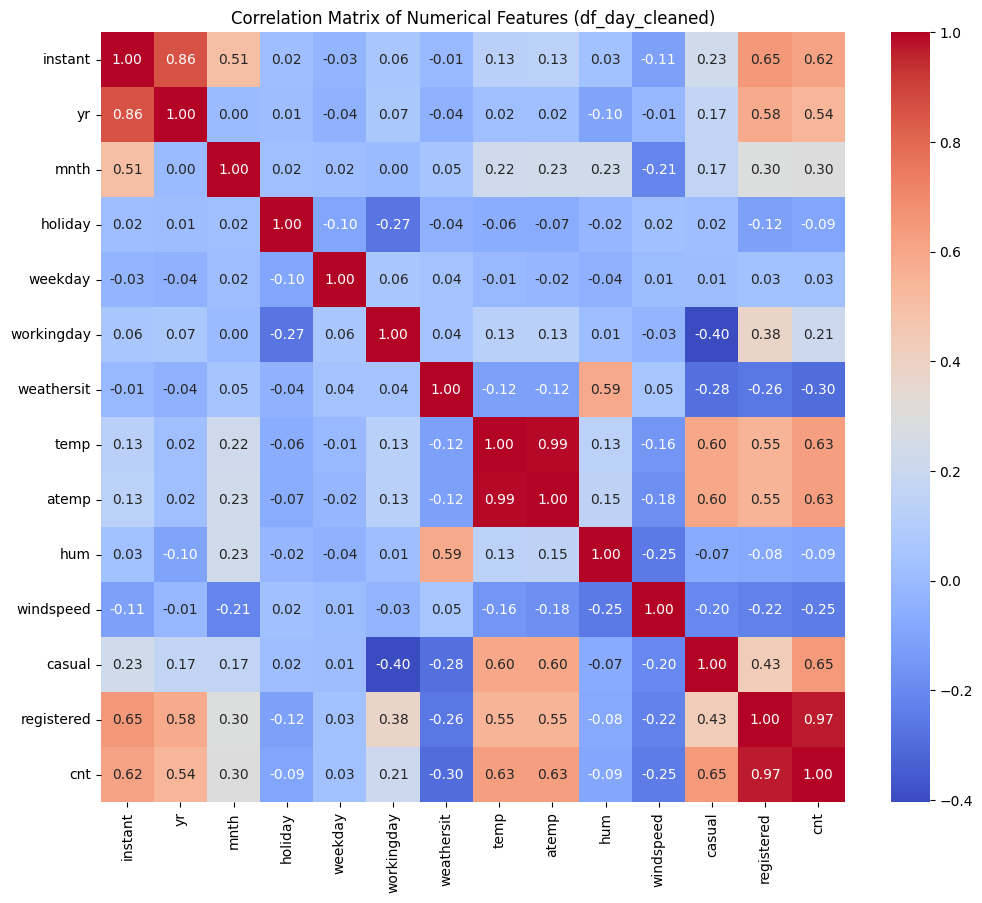

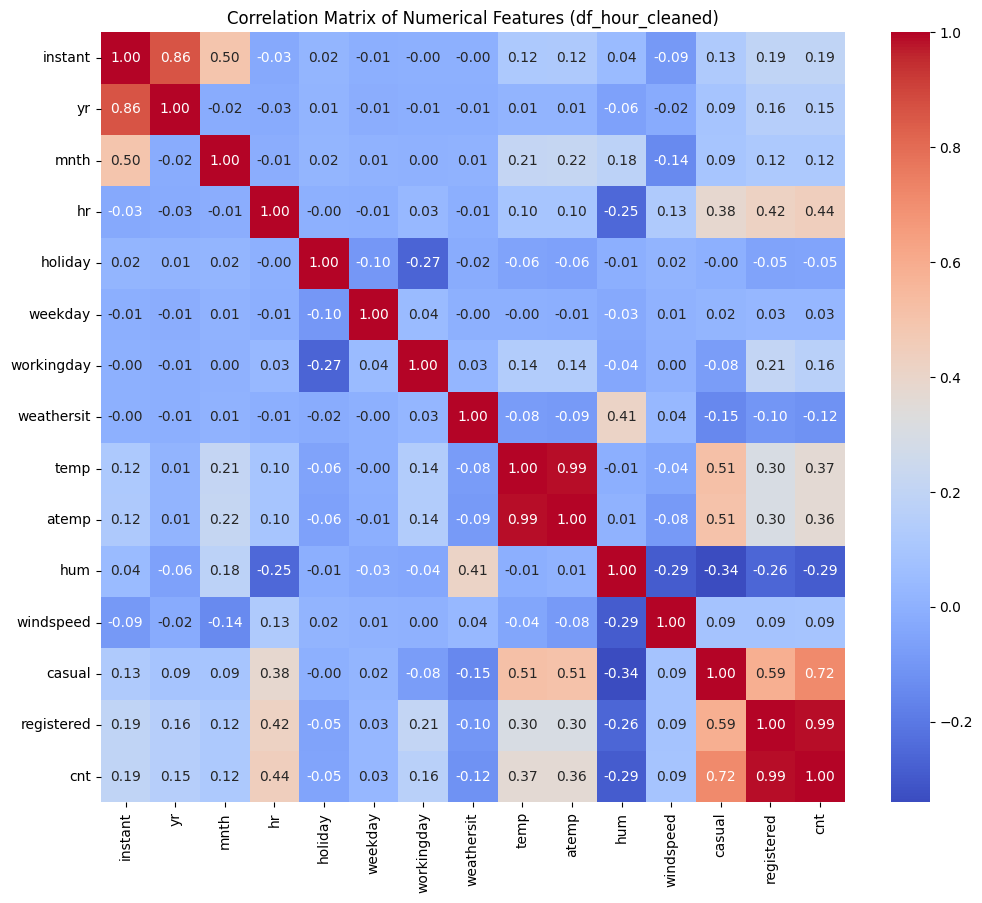

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def correlation_analysis(df, title):
  """
  Calculates and visualizes the correlation matrix for a given DataFrame.

  Args:
      df (pd.DataFrame): The DataFrame to analyze.
      title (str): The title for the correlation matrix plot.

  Returns:
      None
  """
  # Include only numerical features for correlation calculation
  numerical_features = df.select_dtypes(include=np.number).columns
  correlation_matrix = df[numerical_features].corr()

  plt.figure(figsize=(12, 10))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
  plt.title(title)
  plt.show()

# Call the function for df_day_cleaned
correlation_analysis(df_day_cleaned, 'Correlation Matrix of Numerical Features (df_day_cleaned)')

# Call the function for df_hour_cleaned
correlation_analysis(df_hour_cleaned, 'Correlation Matrix of Numerical Features (df_hour_cleaned)')

**Insight:**
- Terdapat korelasi antara suhu (temperature) dan suhu yang dirasakan (apparent temperature) dengan penyewaan sepeda, baik untuk penyewa kasual maupun terdaftar. Peningkatan suhu cenderung diikuti oleh peningkatan jumlah penyewa, menunjukkan bahwa cuaca yang lebih hangat mendorong lebih banyak orang untuk bersepeda. Hal ini juga berlaku untuk suhu yang dirasakan, yang menunjukkan bahwa kenyamanan pengguna berpengaruh terhadap keputusan untuk menyewa sepeda. Dengan demikian, pemahaman tentang faktor-faktor ini dapat membantu perusahaan penyewaan sepeda dalam merencanakan strategi pemasaran dan operasional yang lebih efektif.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa saja faktor yang mempengaruhi penyewaan sepeda?

In [70]:
corr = df_day_cleaned[['temp', 'atemp','casual', 'registered','cnt']].corr()
corr

,temp,atemp,casual,registered,cnt
temp,1.000000,0.991443,0.598537,0.546590,0.630086
atemp,0.991443,1.000000,0.597152,0.549625,0.632270
casual,0.598537,0.597152,1.000000,0.432923,0.646002
registered,0.546590,0.549625,0.432923,1.000000,0.967764
cnt,0.630086,0.632270,0.646002,0.967764,1.000000


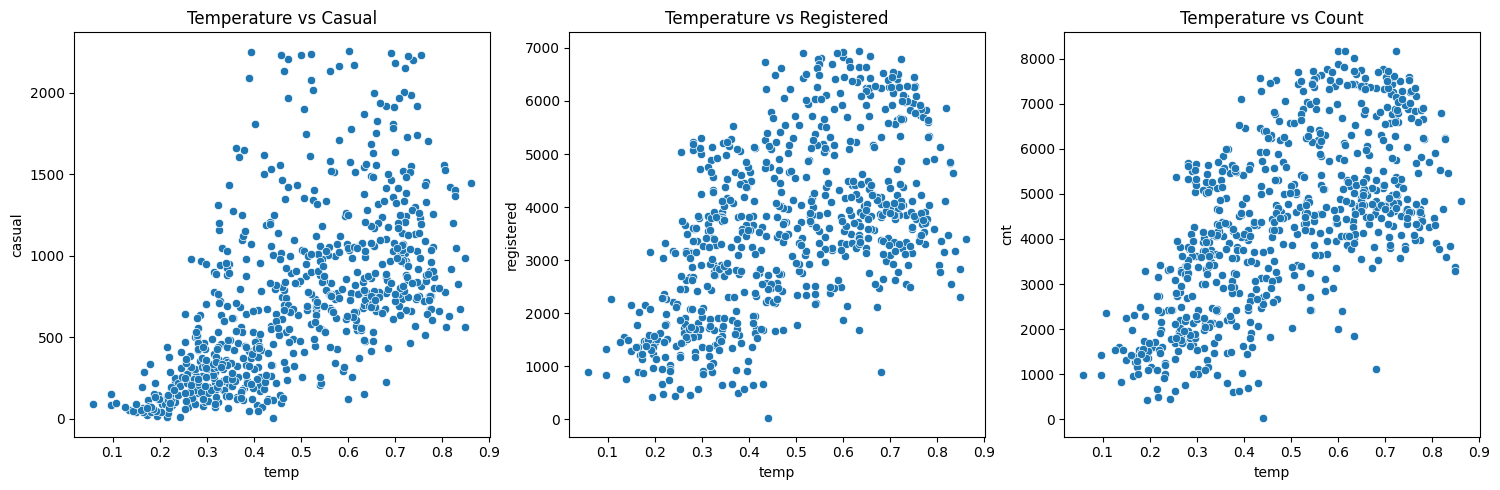

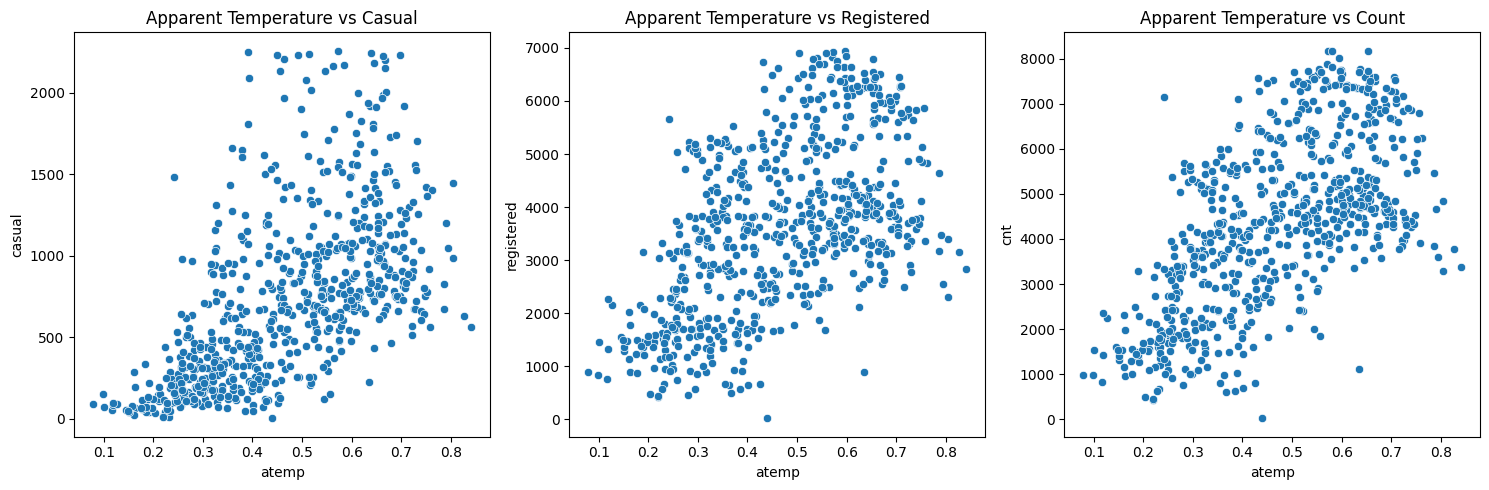

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Alternatively, create individual scatter plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='temp', y='casual', data=df_day_cleaned)
plt.title('Temperature vs Casual')

plt.subplot(1, 3, 2)
sns.scatterplot(x='temp', y='registered', data=df_day_cleaned)
plt.title('Temperature vs Registered')

plt.subplot(1, 3, 3)
sns.scatterplot(x='temp', y='cnt', data=df_day_cleaned)
plt.title('Temperature vs Count')


plt.tight_layout()
plt.show()


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='atemp', y='casual', data=df_day_cleaned)
plt.title('Apparent Temperature vs Casual')

plt.subplot(1, 3, 2)
sns.scatterplot(x='atemp', y='registered', data=df_day_cleaned)
plt.title('Apparent Temperature vs Registered')

plt.subplot(1, 3, 3)
sns.scatterplot(x='atemp', y='cnt', data=df_day_cleaned)
plt.title('Apparent Temperature vs Count')


plt.tight_layout()
plt.show()

### Pertanyaan 2: Musim apa yang menunjukkan peningkatan penyewaan sepeda, dan apa rekomendasi pendekatan penjualan yang efektif pada musim tersebut?

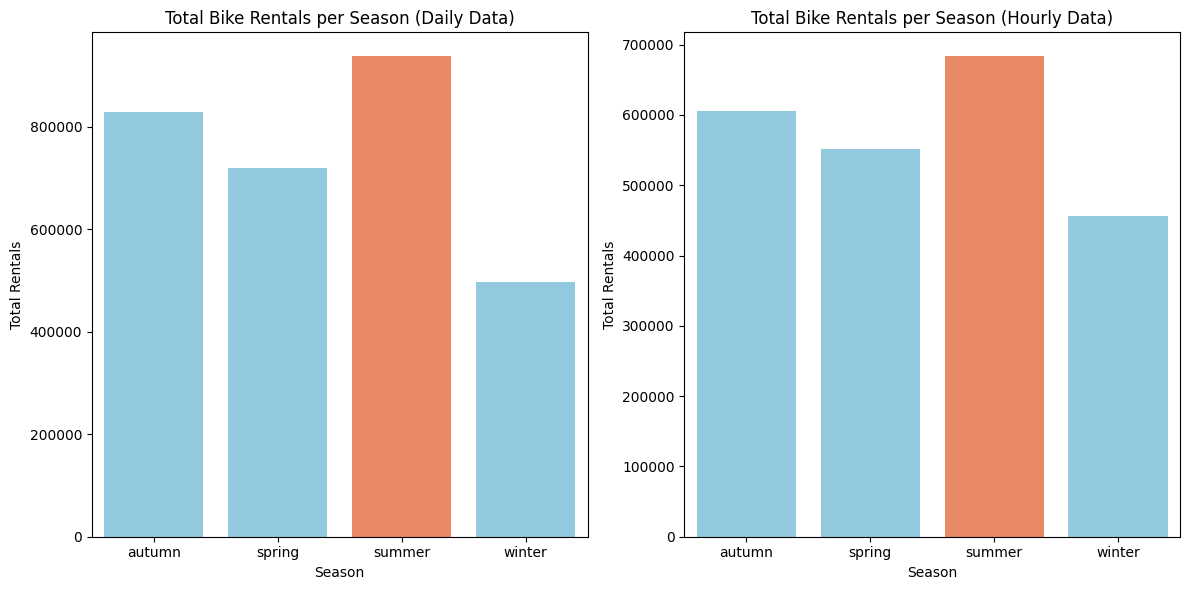

In [80]:
# Visualisasi penyewaan sepeda per musim
plt.figure(figsize=(12, 6))

# Plot for df_day_cleaned
plt.subplot(1, 2, 1)
season_counts_day = df_day_cleaned.groupby('season')['cnt'].sum()
max_season_day = season_counts_day.idxmax()
colors_day = ['skyblue' if season != max_season_day else 'coral' for season in season_counts_day.index]
sns.barplot(x=season_counts_day.index, y=season_counts_day.values, palette=colors_day)
plt.title('Total Bike Rentals per Season (Daily Data)')
plt.xlabel('Season')
plt.ylabel('Total Rentals')


# Plot for df_hour_cleaned
plt.subplot(1, 2, 2)
season_counts_hour = df_hour_cleaned.groupby('season')['cnt'].sum()
max_season_hour = season_counts_hour.idxmax()
colors_hour = ['skyblue' if season != max_season_hour else 'coral' for season in season_counts_hour.index]
sns.barplot(x=season_counts_hour.index, y=season_counts_hour.values, palette=colors_hour)
plt.title('Total Bike Rentals per Season (Hourly Data)')
plt.xlabel('Season')
plt.ylabel('Total Rentals')


plt.tight_layout()
plt.show()

**Insight:**

- Visualisasi data menunjukkan adanya korelasi positif antara suhu, baik aktual maupun yang dirasakan, dengan jumlah penyewa sepeda, baik kasual maupun terdaftar. Ketika suhu meningkat, total penyewaan sepeda juga meningkat, mengindikasikan bahwa cuaca yang lebih hangat menarik lebih banyak orang untuk bersepeda. Ini menegaskan pentingnya faktor cuaca dalam keputusan penyewaan.

-  Musim panas adalah periode di mana penyewaan sepeda mencapai puncaknya. Banyak orang memilih untuk bersepeda sebagai cara untuk menikmati cuaca yang baik dan berpartisipasi dalam aktivitas luar ruangan.

- Setelah musim panas, terdapat musim gugur (autumn) yang juga menawarkan peluang untuk penyewaan sepeda, meskipun tingkat penyewaan mungkin sedikit menurun. Namun, cuaca yang sejuk dan pemandangan alam yang indah pada musim gugur masih menarik bagi para pecinta sepeda.



## Conclusion

- Conclution pertanyaan 1 : Cuaca, khususnya suhu aktual dan suhu yang dirasakan, memainkan peran penting dalam mempengaruhi jumlah penyewaan sepeda, baik untuk penyewa kasual maupun terdaftar. Dengan memahami dampak cuaca terhadap perilaku penyewa, perusahaan penyewaan sepeda dapat mengembangkan strategi pemasaran musiman yang lebih efektif, seperti menawarkan promosi khusus pada hari-hari dengan suhu yang lebih tinggi, untuk menarik lebih banyak penyewa dan meningkatkan pendapatan.

- Conclution pertanyaan 2 : Musim panas adalah periode puncak penyewaan sepeda, sementara musim gugur menawarkan peluang meski dengan penurunan tingkat penyewaan. Cuaca sejuk dan pemandangan indah masih menarik minat pecinta sepeda. Untuk memanfaatkan peluang ini, perusahaan bisa menawarkan diskon atau paket penyewaan khusus, serta menjalankan kampanye pemasaran yang menyoroti keindahan musim gugur. Menyelenggarakan event bersepeda dan menyediakan aksesori seperti peta rute juga dapat meningkatkan keterlibatan pelanggan. Dengan langkah-langkah ini, perusahaan dapat memaksimalkan potensi penyewaan dan menjaga kepuasan pelanggan di musim gugur.